<a href="https://colab.research.google.com/github/Zuhair0000/tensorflow_bootcamp/blob/main/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2026-02-07 07:31:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.4MB/s    in 3.4s    

2026-02-07 07:31:41 (30.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Modren way

# with zipfile.ZipFile('pizza_steak.zip', 'r') as zip_ref:
#   zip_ref.extractall('extracted_data')
#   print("Unzipping complete")

# inspect The data

In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 0 images in 'pizza_steak.
There are 2 directories and 0 images in 'pizza_steak/train.
There are 0 directories and 750 images in 'pizza_steak/train/steak.
There are 0 directories and 750 images in 'pizza_steak/train/pizza.
There are 2 directories and 0 images in 'pizza_steak/test.
There are 0 directories and 250 images in 'pizza_steak/test/steak.
There are 0 directories and 250 images in 'pizza_steak/test/pizza.


In [5]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

# View random image from the training dataset

Image shape: (512, 384, 3)


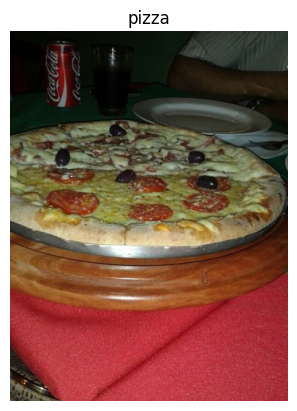

In [8]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  4,   5,   0],
        [  4,   5,   0],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 42,  52,  44]],

       [[  4,   5,   0],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 48,  58,  50],
        [ 48,  58,  50],
        [ 44,  54,  46]],

       [[  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [ 46,  56,  48],
        [ 45,  55,  47],
        [ 45,  55,  47]],

       ...,

       [[ 96,  75,  46],
        [ 91,  71,  44],
        [ 89,  72,  46],
        ...,
        [155,  35,  45],
        [154,  34,  46],
        [163,  43,  55]],

       [[113,  90,  59],
        [ 90,  69,  38],
        [ 91,  71,  44],
        ...,
        [156,  36,  48],
        [148,  28,  40],
        [154,  34,  46]],

       [[123, 100,  68],
        [ 94,  73,  42],
        [106,  85,  56],
        ...,
        [173,  53,  6

# An end-to-end example

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3),
                           ),
    tf.keras.layers.Conv2D(10, 2, activation='relu'),

    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Conv2D(10, 2, activation='relu'),
    tf.keras.layers.Conv2D(10, 2, activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')

])


model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 221, 221, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 108, 108, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        29,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,015 (359.44 KB)

 Trainable params: 30,671 (119.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,344 (239.63 KB)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.5218 - loss: 3.1590 - val_accuracy: 0.7400 - val_loss: 0.8022
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.7206 - loss: 1.2321 - val_accuracy: 0.6880 - val_loss: 0.8750
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6609 - loss: 0.9567 - val_accuracy: 0.5100 - val_loss: 0.6793
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.4934 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.4881 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.5142 - loss: 6.6255 - val_accuracy: 0.5780 - val_loss: 2.2846
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.6714 - loss: 1.6927 - val_accuracy: 0.6240 - val_loss: 1.7653
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.7093 - loss: 1.0482 - val_accuracy: 0.5960 - val_loss: 1.4801
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.6813 - loss: 1.2406 - val_accuracy: 0.7800 - val_loss: 0.8066
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.7835 - loss: 0.6337 - val_accuracy: 0.6980 - val_loss: 0.9507


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

# Binary Classification

## 1. Become one with the data (Visualize)

In [ ]:
import tensorflow as tf

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


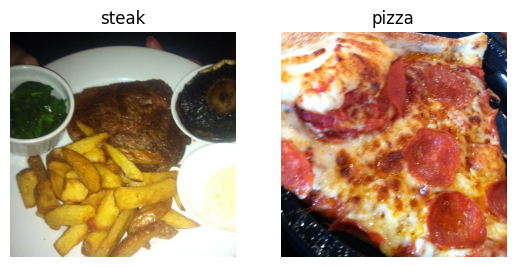

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

## 2. Preprocess the data

In [ ]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

### Old Preprocessing method

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)

# train_data = train_datagen.flow_from_directory(train_dir,
#                                                batch_size=32,
#                                                image_size=(224, 224),
#                                                seed=42)

# test_data = test_datagen.flow_from_directory(test_dir,
#                                              batch_size=32,
#                                              image_size=(224, 224),
#                                              seed=42)

### Modern preprocessing method

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


## 3. Create CNN model

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           strides=(1, 1),
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6348 - loss: 5.3254 - val_accuracy: 0.8080 - val_loss: 0.4153
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.7692 - loss: 0.5477 - val_accuracy: 0.7500 - val_loss: 0.4886
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.8200 - loss: 0.4212 - val_accuracy: 0.7480 - val_loss: 0.5693
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - accuracy: 0.8863 - loss: 0.2915 - val_accuracy: 0.8100 - val_loss: 0.4957
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.9381 - loss: 0.1409 - val_accuracy: 0.7720 - val_loss: 0.7708


In [ ]:
# Create the model with your current settings
model_valid = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, padding='valid'), # <--- VALID
    tf.keras.layers.Conv2D(32, 3, padding='valid')
])
print("--- VALID PADDING ---")
model_valid.summary()

# Create the model with modern settings
model_same = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, padding='same'), # <--- SAME
    tf.keras.layers.Conv2D(32, 3, padding='same')
])
print("\n--- SAME PADDING ---")
model_same.summary()

--- VALID PADDING ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)


--- SAME PADDING ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

<Axes: >

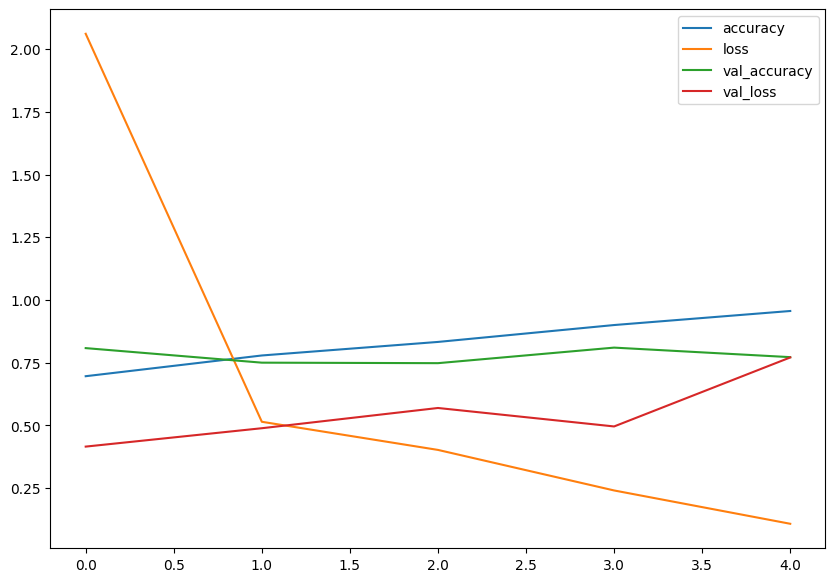

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [10]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [11]:
plot_loss_curves(history_4)

NameError: name 'history_4' is not defined

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           strides=(1, 1),
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.5662 - loss: 0.6625 - val_accuracy: 0.8020 - val_loss: 0.4701
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7959 - loss: 0.4722 - val_accuracy: 0.8220 - val_loss: 0.4049
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8133 - loss: 0.4231 - val_accuracy: 0.8540 - val_loss: 0.3807
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8339 - loss: 0.3982 - val_accuracy: 0.8620 - val_loss: 0.3635
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8567 - loss: 0.3553 - val_accuracy: 0.8620 - val_loss: 0.3298


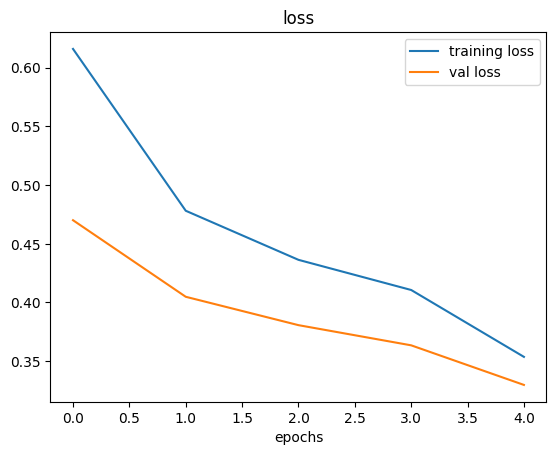

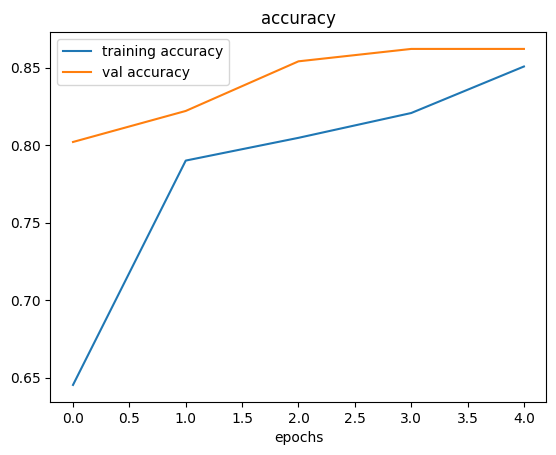

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

# **Old way augmentation**

In [ ]:
# Old way

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
#                                              rotation_range=0.2,
#                                              shear_range=0.2,
#                                              zoom_range=0.2,
#                                              width_shift_range=0.2,
#                                              height_shift_range=0.3,
#                                              horizontal_flip=False)


# train_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
#                                                                    target_size=(224, 224),
#                                                                    batch_size=32,
#                                                                    class_mode='binary',
#                                                                    shuffle=False)

# train_data = train_datagen.flow_from_directory(train_dir,
#                                                batch_size=32,
#                                                target_size=(224, 224),
#                                                class_mode='binary',
#                                                shuffle=False)

# test_data = test_datagen.flow_from_directory(test_dir,
#                                              batch_size=32,
#                                              target_size=(224, 224),
#                                              class_mode='binary',
#                                              shuffle=False,
#                                              )

# **Modern way augmentation**

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         shuffle=True,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         shuffle=False,
                                                         seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomZoom(0.2),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_6 = model_6.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.6035 - loss: 0.6501 - val_accuracy: 0.7560 - val_loss: 0.5154
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.7437 - loss: 0.5166 - val_accuracy: 0.8220 - val_loss: 0.4211
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8001 - loss: 0.4559 - val_accuracy: 0.8340 - val_loss: 0.3849
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.7878 - loss: 0.4569 - val_accuracy: 0.8500 - val_loss: 0.3647
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8013 - loss: 0.4432 - val_accuracy: 0.8560 - val_loss: 0.3567


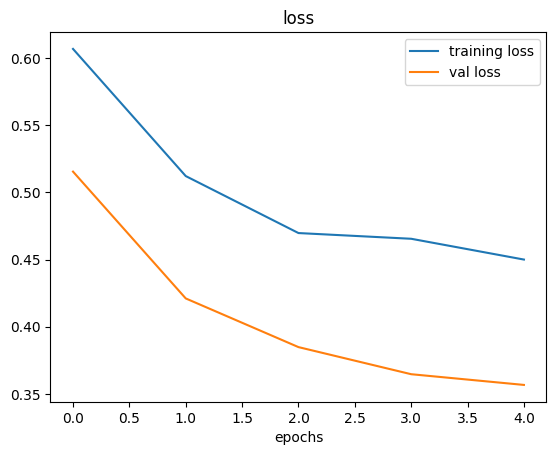

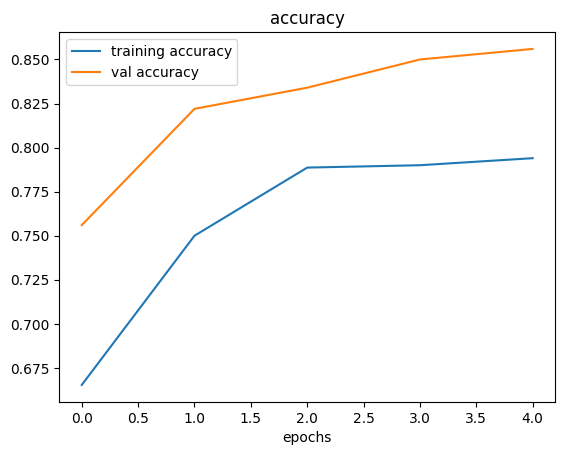

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

In [ ]:
steak = mpimg.imread('/content/03-steak.jpeg')

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [12]:
def load_and_prep_image(filename, image_shape=224):
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, [image_shape, image_shape])

  return img

In [46]:
steak = load_and_prep_image('03-steak.jpeg')
steak

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} 03-steak.jpeg; No such file or directory [Op:ReadFile]

In [ ]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.89119667]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [31]:
def pred_and_plt(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img / 255.)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


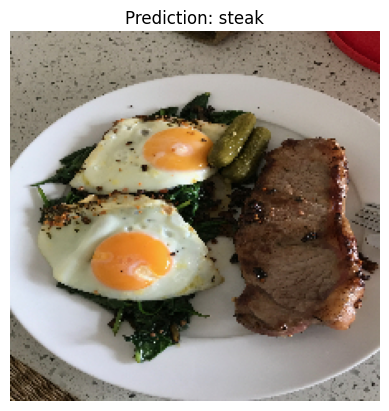

In [ ]:
pred_and_plt(model_6, '03-steak.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


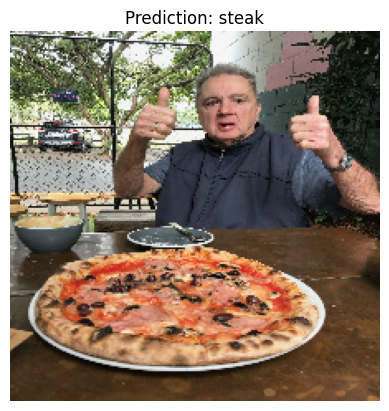

In [ ]:
pred_and_plt(model_6, '03-pizza-dad.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


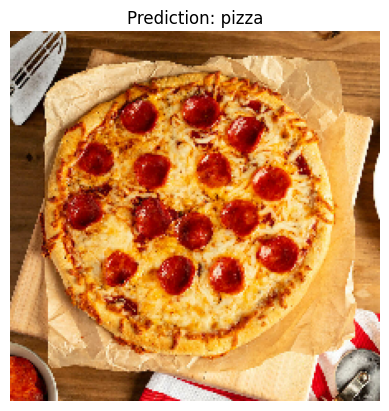

In [ ]:
pred_and_plt(model_6, 'pizza1.jpg')

# Multi_class Image Classification

## 1. Load data

In [17]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

with zipfile.ZipFile('10_food_classes_all_data.zip', 'r') as zip_ref:
  zip_ref.extractall('.')
  print("Unzipping complete")

--2026-02-07 07:35:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  41.1MB/s    in 13s     

2026-02-07 07:35:19 (38.7 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]

Unzipping complete


In [18]:
import os

for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' "   )

There are 4 directories and 0 images in '10_food_classes_all_data' 
There are 2 directories and 0 images in '10_food_classes_all_data/10_food_classes_all_data' 
There are 10 directories and 0 images in '10_food_classes_all_data/10_food_classes_all_data/train' 
There are 0 directories and 750 images in '10_food_classes_all_data/10_food_classes_all_data/train/ramen' 
There are 0 directories and 750 images in '10_food_classes_all_data/10_food_classes_all_data/train/chicken_curry' 
There are 0 directories and 750 images in '10_food_classes_all_data/10_food_classes_all_data/train/steak' 
There are 0 directories and 750 images in '10_food_classes_all_data/10_food_classes_all_data/train/hamburger' 
There are 0 directories and 750 images in '10_food_classes_all_data/10_food_classes_all_data/train/chicken_wings' 
There are 0 directories and 750 images in '10_food_classes_all_data/10_food_classes_all_data/train/grilled_salmon' 
There are 0 directories and 750 images in '10_food_classes_all_data/

In [19]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [20]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


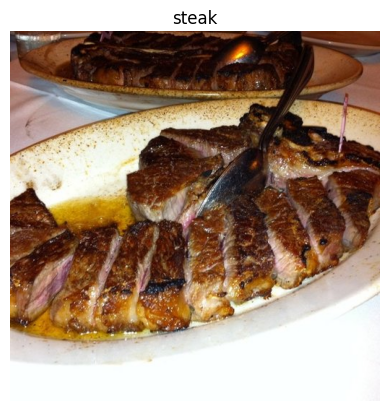

In [21]:
import random
img = view_random_image(train_dir, random.choice(class_names))

## 2. Preprocessing

In [22]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         shuffle=True,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         shuffle=True,
                                                         seed=42)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## 3. Train Model

In [23]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_7.compile(loss = 'sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_7 = model_7.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.1679 - loss: 2.2085 - val_accuracy: 0.2884 - val_loss: 2.0143
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.3437 - loss: 1.8848 - val_accuracy: 0.3604 - val_loss: 1.8391
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.4842 - loss: 1.4965 - val_accuracy: 0.3460 - val_loss: 1.9750
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.6967 - loss: 0.9369 - val_accuracy: 0.3256 - val_loss: 2.5155
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.8771 - loss: 0.4089 - val_accuracy: 0.2828 - val_loss: 3.6141


## 4. Evaluate

In [24]:
model_7.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2735 - loss: 3.5727


[3.6140620708465576, 0.28279998898506165]

It seems our model is overfitting the training set quite badly
It is getting goodd results in training set but fails to generalize well to new and unseen data

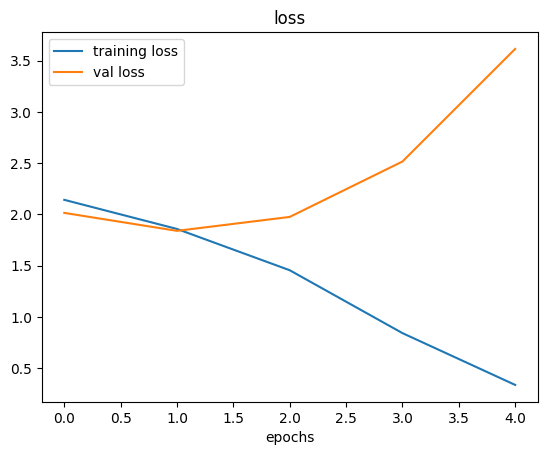

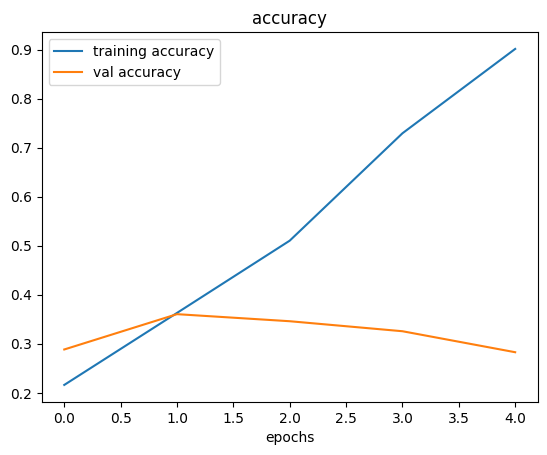

In [25]:
plot_loss_curves(history_7)

In [26]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_8.compile(loss = 'sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - accuracy: 0.1787 - loss: 2.5087 - val_accuracy: 0.3156 - val_loss: 1.9624
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.3858 - loss: 1.7948 - val_accuracy: 0.3320 - val_loss: 1.9274
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.5274 - loss: 1.4262 - val_accuracy: 0.3068 - val_loss: 2.0926
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.6814 - loss: 1.0206 - val_accuracy: 0.2732 - val_loss: 2.4736
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.8023 - loss: 0.6616 - val_accuracy: 0.2580 - val_loss: 2.9615


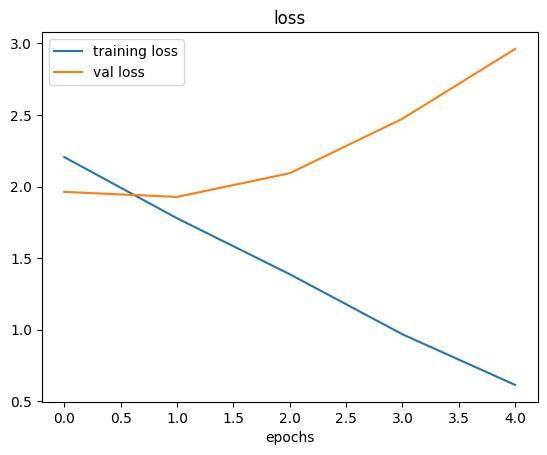

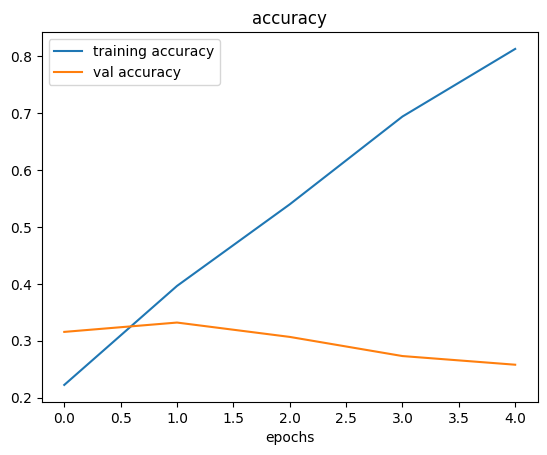

In [27]:
plot_loss_curves(history_8)

In [29]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_9.compile(loss = 'sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 111ms/step - accuracy: 0.1611 - loss: 2.2200 - val_accuracy: 0.2868 - val_loss: 1.9923
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.2979 - loss: 1.9671 - val_accuracy: 0.3096 - val_loss: 1.9457
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.3312 - loss: 1.9079 - val_accuracy: 0.3620 - val_loss: 1.8564
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.3381 - loss: 1.8695 - val_accuracy: 0.3780 - val_loss: 1.8065
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.3706 - loss: 1.8208 - val_accuracy: 0.3868 - val_loss: 1.7839


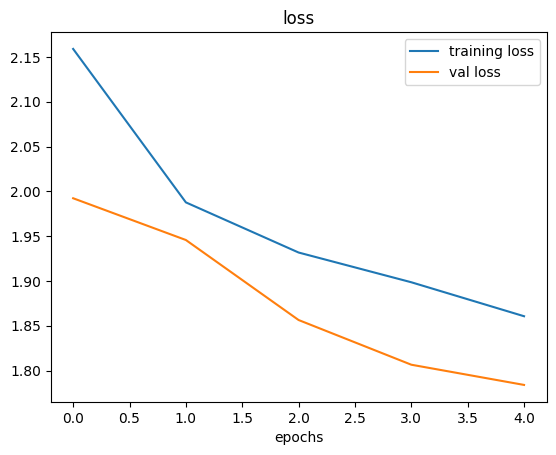

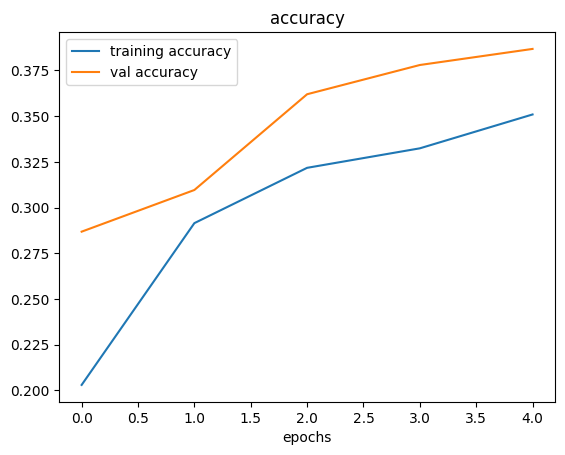

In [30]:
plot_loss_curves(history_9)

In [36]:
def pred_and_plt(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img / 255.)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


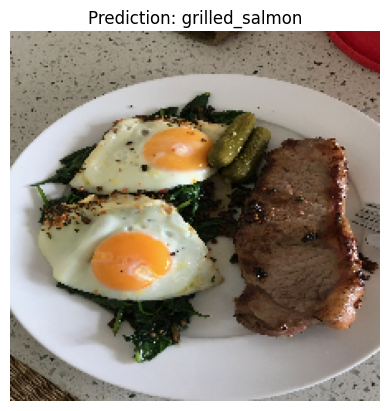

In [40]:
pred_and_plt(model_9,
             filename="03-steak.jpeg",
             class_names=class_names)

# Save model

In [42]:
model_9.save("saved_model.keras")

In [44]:
loaded_model = tf.keras.models.load_model('saved_model.keras')
loaded_model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.3994 - loss: 1.7649


[1.783923625946045, 0.38679999113082886]

In [45]:
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.3988 - loss: 1.7584


[1.783923625946045, 0.38679999113082886]